In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
stock = pd.read_csv('HPG Historical Data.csv')

In [3]:
stock['Date'] = pd.to_datetime(stock['Date'])



In [4]:
stock['Price'] = stock['Price'].str.replace(',', '').astype(float)
stock['Open'] = stock['Open'].str.replace(',', '').astype(float)
stock['High'] = stock['High'].str.replace(',', '').astype(float)
stock['Low'] = stock['Low'].str.replace(',', '').astype(float)
stock['Vol.'] = stock['Vol.'].str.replace('M', '').astype(float)
stock['Change %'] = stock['Change %'].str.replace('%', '').astype(float)


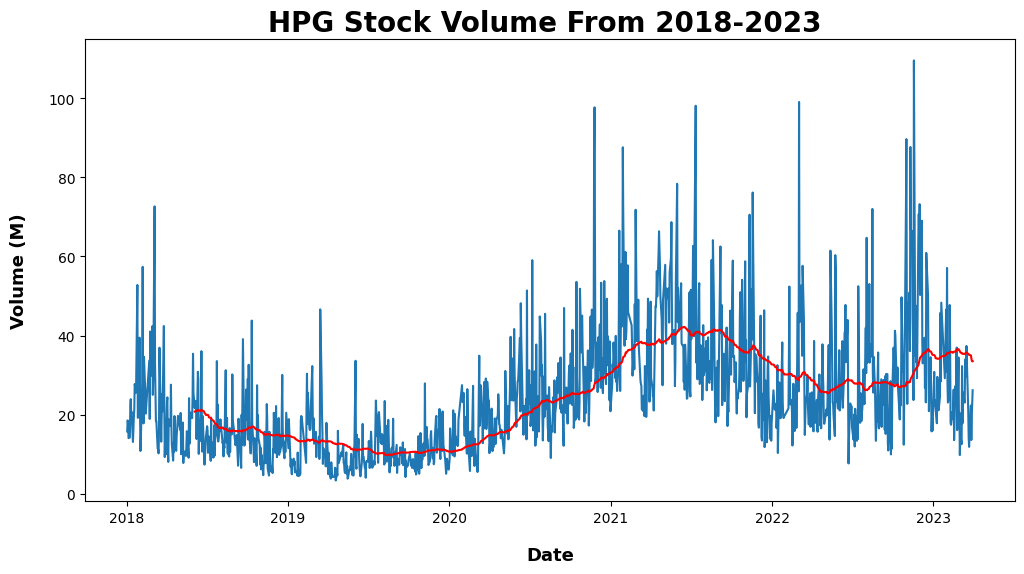

In [77]:
# Plot of stock volume curve 
plt.figure(figsize=(12,6))
# make the color light blue 

plt.plot(stock['Vol.'])
plt.title('HPG Stock Volume From 2018-2023 ', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold',labelpad=15)
plt.ylabel('Volume (M)',fontsize =13, fontweight='bold',labelpad=15)

# Make the curve smooth
plt.plot(stock['Vol.'].rolling(window=100).mean(), color='red')




plt.show()

In [5]:
#How many Average days per year 
print(stock['Date'].dt.year.value_counts().mean())


218.0


In [6]:
# Conduct basic statistics on the stock data 
stock.describe()



,Date,Price,Open,High,Low,Vol.,Change %
count,1308,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,2020-08-18 12:58:20.917431296,19249.098318,19261.464985,19541.894801,18986.827905,24.253647,0.064274
min,2018-01-02 00:00:00,7411.800000,7000.000000,7640.600000,6977.200000,3.320000,-7.000000
25%,2019-05-05 06:00:00,11605.100000,11613.900000,11736.650000,11445.475000,13.192500,-1.132500
50%,2020-08-18 12:00:00,14957.300000,14944.750000,15183.600000,14719.000000,21.025000,0.000000
75%,2021-12-06 06:00:00,24003.825000,24081.000000,24339.325000,23621.425000,31.202500,1.222500
max,2023-03-31 00:00:00,43895.800000,43895.800000,44198.500000,43517.400000,109.620000,6.940000
std,NaN,9780.769912,9809.760926,9929.208070,9676.520954,15.021485,2.374579


In [7]:
#Examine the seasonality of the stock price
from statsmodels.tsa.seasonal import seasonal_decompose
df_season = pd.read_csv('HPG Historical Data.csv', parse_dates=['Date'], index_col='Date')
df_season['Price'] = df_season['Price'].str.replace(',', '').astype(float)
df_season.sort_index(inplace=True)
df_season = df_season[['Price']]

print(df_season.shape)

(1308, 1)


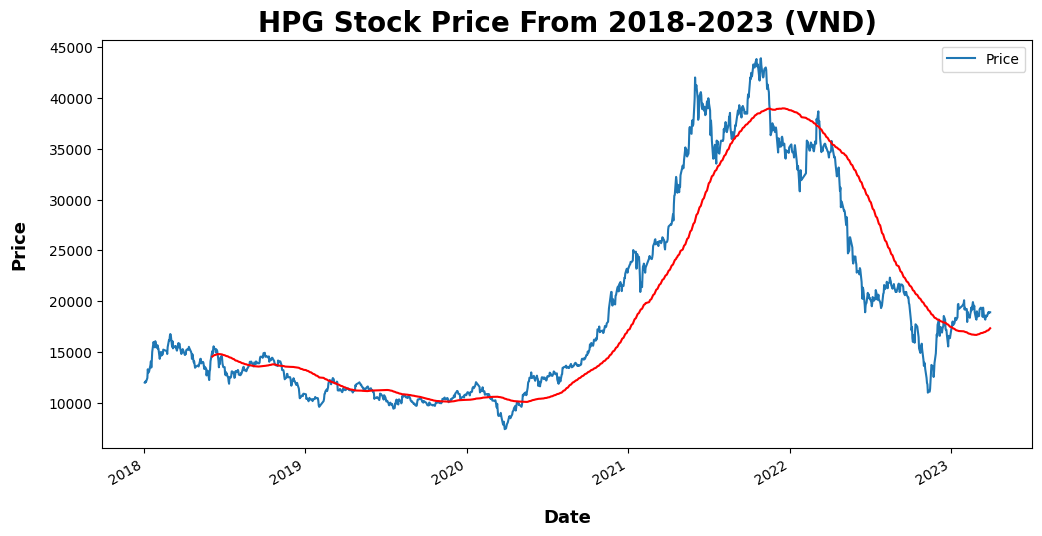

In [76]:
df_season.plot(figsize = (12, 6))
# Add the y label as 'Price'
#make the distance between the label and the y-axis to be 15
plt.ylabel('Price', labelpad=15, fontsize=13, fontweight='bold')
plt.xlabel('Date', labelpad=15, fontsize=13, fontweight='bold')
plt.title('HPG Stock Price From 2018-2023 (VND)', fontsize=20, fontweight='bold')
plt.plot(df_season['Price'].rolling(window=100).mean(), color='red')
plt.show()

In [9]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308 entries, 2018-01-02 to 2023-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1308 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


<Axes: xlabel='Date'>

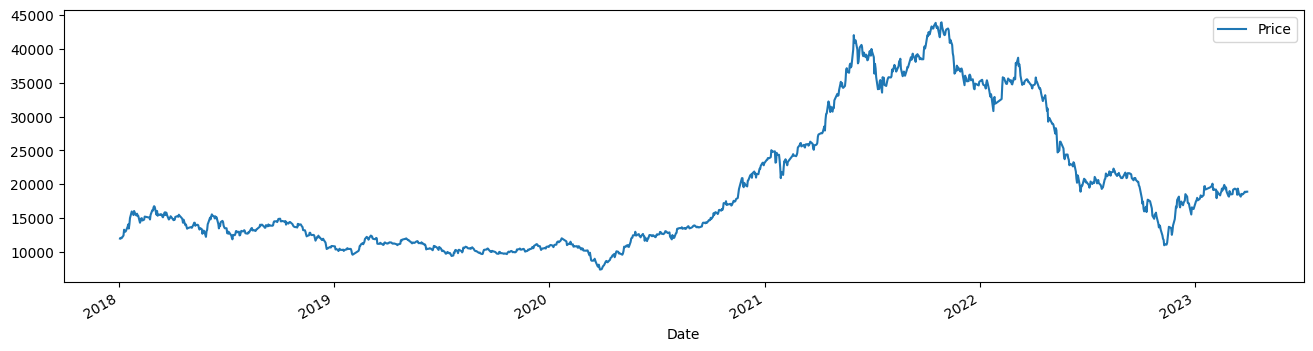

In [10]:
df_season.plot(figsize=(16, 4))


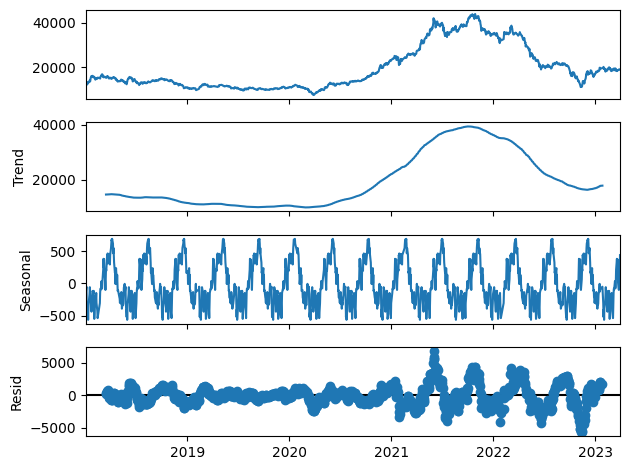

In [11]:
result = seasonal_decompose(df_season, period = 90)
result.plot()
plt.show()

period xấp xỉ 120 ngày 

In [55]:

 
# Calculate average  percentage change in stock price of the first day of the month
stock['month'] = stock.index.month
stock['day'] = stock.index.day 
stock['year'] = stock.index.year 

# Filter row that has the smallest day of the month
stock_smallest_day = stock.loc[stock.groupby(['year', 'month'])['day'].idxmin()]
stock_smallest_day.head(30)
# delete other coumns except Price , month and year
stock_smallest_day_new = stock_smallest_day[['Price', 'month', 'year','Vol.']]
# Calculate  percentage change in stock price 
stock_smallest_day_new['Price_change'] = stock_smallest_day_new['Price'].pct_change()
stock_smallest_day_new['Price_change'] = stock_smallest_day_new['Price_change']*100
# The volume of stock traded on the first day of the month
stock_smallest_day_new['Vol. change'] = average_percentage_change_volume.values
stock_smallest_day_new['Vol. average'] = average_volume.values
stock_smallest_day_new.head(30)



/tmp/ipykernel_3002/1912722233.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_smallest_day_new['Price_change'] = stock_smallest_day_new['Price'].pct_change()
/tmp/ipykernel_3002/1912722233.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_smallest_day_new['Price_change'] = stock_smallest_day_new['Price_change']*100
/tmp/ipykernel_3002/1912722233.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Price,month,year,Vol.,Price_change,Vol. change,Vol. average
Date,,,,,,,
2018-01-02,11991.0,1,2018,15.73,NaN,9.676115,22.127000
2018-02-01,15334.4,2,2018,10.78,27.882579,20.324936,28.613333
2018-03-01,16767.3,3,2018,24.98,9.344350,7.177646,22.896818
2018-04-02,14831.7,4,2018,23.36,-11.543898,14.947012,16.056316
2018-05-02,13675.3,5,2018,16.09,-7.796814,11.318416,15.859091
2018-06-01,14328.9,6,2018,25.47,4.779420,7.230397,18.273810
2018-07-02,13514.4,7,2018,17.04,-5.684316,11.208222,14.588636
2018-08-01,13232.8,8,2018,18.78,-2.083703,9.600810,15.623043
2018-09-04,13725.6,9,2018,12.25,3.724080,20.325386,15.998421


/tmp/ipykernel_3002/1007161510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_smallest_day_new['Date'] = stock_smallest_day_new['year'].astype(str) + '-' + stock_smallest_day_new['month'].astype(str)


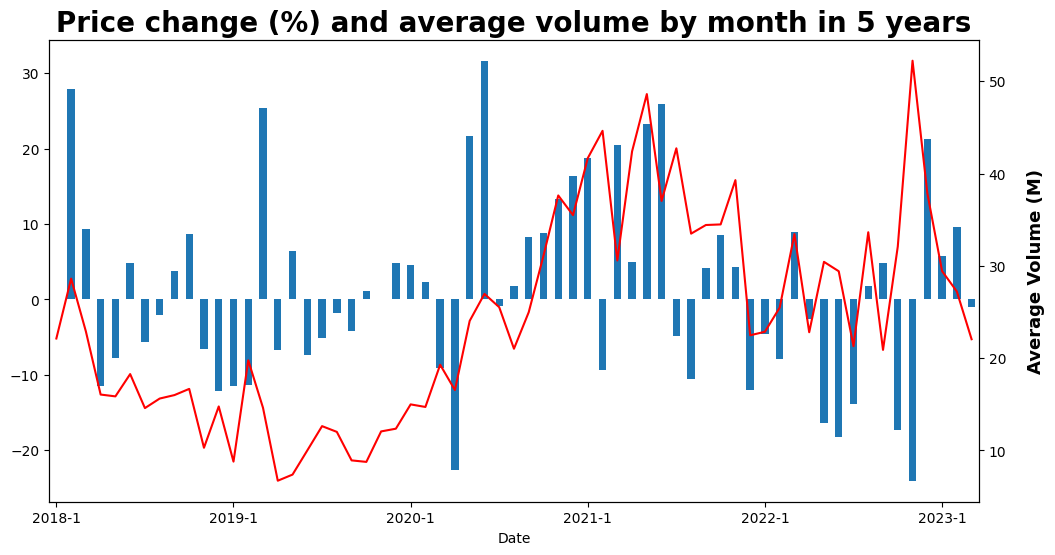

In [79]:
# Format the date to be more readable
stock_smallest_day_new['Date'] = stock_smallest_day_new['year'].astype(str) + '-' + stock_smallest_day_new['month'].astype(str)
# Don't include time in the date

stock_smallest_day_new.set_index('Date', inplace=True)

stock_smallest_day_new['Price_change'].plot(kind='bar',figsize=(12,6))  
# Include the curve showing the average percentage change in volume of stock traded on the first day of the month

stock_smallest_day_new['Vol. average'].plot(secondary_y=True, color='red')
# Add labels to the secondary_y axis
plt.ylabel('Average Volume (M)', fontsize=13, fontweight='bold', labelpad=15)

plt.xlabel('Date',fontsize=13, fontweight='bold',labelpad=15)
plt.title('Price change (%) and average volume by month in 5 years', fontsize=20, fontweight='bold')
# Only show the first month of each year on the x-axis
plt.xticks(np.arange(0, len(stock_smallest_day_new), 12), stock_smallest_day_new.index[::12])

# Scale the y-axis to be the same for both curves


plt.show()

In [29]:
# Plot the average price change by month in 5 years
# Calculate average price change by month
stock_smallest_day_new.groupby('month','year')['Price_change'].mean().plot(kind='bar')  
plt.xlabel('Month')
plt.ylabel('%')
plt.title('Average price change by month in 5 years')
# draw a line for the average volume change by month 
plt.axhline(y=stock_smallest_day_new['Price_change'].mean(), color='r', linestyle='--')


ValueError: No axis named year for object type DataFrame

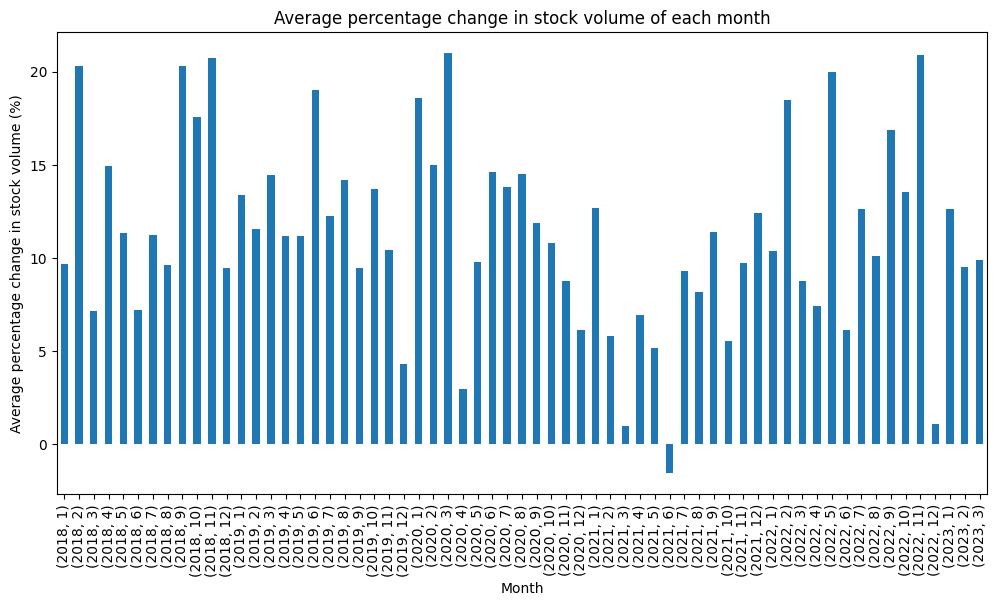

In [41]:
stock['percentage_change_volume'] = (stock['Vol.'] - stock['Vol.'].shift(1)) / stock['Vol.'].shift(1) * 100
average_percentage_change_volume = stock.groupby(['year','month'])['percentage_change_volume'].mean()
average_percentage_change_volume.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Average percentage change in stock volume (%)')
plt.title('Average percentage change in stock volume of each month')
plt.show()

In [53]:
stock.head()

,Price,Open,High,Low,Vol.,Change %,month,day,year,percentage_change_volume
Date,,,,,,,,,,
2018-01-02,11991.0,11789.9,12003.6,11676.8,15.73,1.81,1,2,2018,NaN
2018-01-03,11965.9,12066.4,12192.1,11890.5,18.51,-0.21,1,3,2018,17.673236
2018-01-04,12116.7,12016.2,12167.0,11965.9,17.79,1.26,1,4,2018,-3.889789
2018-01-05,12066.4,12091.6,12179.6,11978.4,14.03,-0.42,1,5,2018,-21.135469
2018-01-08,12443.5,11991.0,12443.5,11940.7,14.19,3.13,1,8,2018,1.140413


In [43]:
print(average_percentage_change_volume.values)

[ 9.67611535 20.32493599  7.17764588 14.94701239 11.31841622  7.23039689
 11.20822237  9.60080956 20.32538648 17.55809936 20.72459597  9.4418359
 13.37032547 11.57248232 14.42745076 11.15389632 11.18622025 19.02297619
 12.22805327 14.17710955  9.47514813 13.68136766 10.45114655  4.32204088
 18.60999838 14.9808194  20.99304863  2.95333649  9.76441402 14.58914264
 13.82389933 14.53095954 11.88468328 10.80067208  8.75283904  6.14083238
 12.68672437  5.81643593  0.99764063  6.92796203  5.17715604 -1.54358089
  9.29826279  8.16723005 11.3918033   5.552791    9.70816245 12.4157442
 10.37480886 18.49812192  8.78441697  7.42920056 19.9651071   6.13687026
 12.62287847 10.09886602 16.83988827 13.5655661  20.88928293  1.09735867
 12.64733287  9.49477629  9.86937802]


In [54]:
# AVerage volume of stock for each month 
stock['month'] = stock.index.month
average_volume = stock.groupby(['year','month'])['Vol.'].mean()
average_volume.values 

array([22.127     , 28.61333333, 22.89681818, 16.05631579, 15.85909091,
       18.27380952, 14.58863636, 15.62304348, 15.99842105, 16.66913043,
       10.29136364, 14.767     ,  8.79      , 19.76733333, 14.61571429,
        6.72105263,  7.38636364, 10.003     , 12.63478261, 12.01227273,
        8.924     ,  8.76130435, 12.06142857, 12.35818182, 14.99058824,
       14.712     , 19.28727273, 16.5395    , 24.037     , 26.96045455,
       25.52173913, 21.02      , 24.97857143, 31.10318182, 37.62571429,
       35.49043478, 41.6705    , 44.628     , 30.57869565, 42.3955    ,
       48.609     , 37.02818182, 42.73227273, 33.48818182, 34.4235    ,
       34.48619048, 39.28545455, 22.47608696, 22.85894737, 25.474375  ,
       33.44217391, 22.8045    , 30.433     , 29.415     , 21.29714286,
       33.63913043, 20.895     , 32.09428571, 52.22090909, 37.88909091,
       29.4325    , 27.2235    , 22.05043478])